#### Description

Imagine we work for a large dating app.

In addition to the basic features, the app also has a premium subscription that gives you access to a number of important additional features.

An A/B test was conducted, in which the cost of a premium subscription* was changed for new users from several countries when purchasing through two new payment systems. However, the cost of the trial period remained the same.
Task:

     Check whether the experiment was successful overall.
     Analyze whether the innovation makes sense among any specific user groups.
     The subscription fee is debited monthly until the user cancels it.

There are three groups in total: test, control 1 (control_1) and control 2 (contr
#### Task:

- Check whether the experiment was successful overall.
- Analyze whether the innovation makes sense among any specific user groups.
*Subscription fees are charged monthly until the user cancels it.

There are three groups in total: test, control 1 (control_1) and control 2 (control_2).
#### Data
Let's assume that control_1 and control_2 worked according to the old version, and the test version received two new payment systems.
users_*.csv – information about users



In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2, shapiro
from scipy import stats
from tqdm.auto import tqdm

### The data on transactions in groups

In [2]:
try:
 A1=pd.read_csv('./Проект_3_transactions_control_1.csv', sep = ";")
except:
 A1=pd.read_csv('/Проект_3_transactions_control_1.csv', sep = ";")

In [3]:
try:
 A2=pd.read_csv('./Проект_3_transactions_control_2.csv', sep = ";")
except:
 A2=pd.read_csv('/Проект_3_transactions_control_2.csv', sep = ";")


In [4]:
try:
 Test=pd.read_csv('./Проект_3_transactions_test.csv', sep = ";")
except:
 Test=pd.read_csv('/Проект_3_transactions_test.csv', sep = ";")

In [5]:
A1.describe()

,uid,revenue,payment_id
count,3.770000e+02,377.000000,377.000000
mean,8.923612e+08,6929.206897,91.145889
std,6.162900e+06,8027.889630,58.599773
min,8.910923e+08,26.000000,0.000000
25%,8.913833e+08,2730.000000,19.000000
50%,8.918225e+08,6266.000000,127.000000
75%,8.921850e+08,6448.000000,147.000000
max,9.609370e+08,63037.000000,147.000000


In [6]:
A1.shape # number of rows and columns

(1007, 8)

In [7]:
A1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   uid           377 non-null    float64
 1   country       377 non-null    object 
 2   joined_at     1007 non-null   object 
 3   paid_at       1007 non-null   object 
 4   revenue       377 non-null    float64
 5   payment_id    377 non-null    float64
 6   from_page     377 non-null    object 
 7   product_type  377 non-null    object 
dtypes: float64(3), object(5)
memory usage: 63.1+ KB


In [8]:
A1.duplicated().sum() # number of duplicates

650

In [9]:
A1.drop_duplicates(inplace=True) # drop rows with dplicates

In [10]:
print("There are in А1:"+" "+ str(A1.shape[0])+" "+"transactions" + "."
      + " Where"+" "+ str(A1.uid.nunique())+" "+" are unique IDs"+"; "+ "Start date is"+"  "+
     str(A1['joined_at'].min())+ ", end date "+ str(A1['joined_at'].max()))

There are in А1: 357 transactions. Where 193  are unique IDs; Start date is  2015-01-19 11:49:00, end date NaT


In [11]:
A2.describe()

,uid,revenue,payment_id
count,3.280000e+02,328.000000,328.000000
mean,8.918121e+08,5854.993902,95.527439
std,3.802149e+05,6582.242539,57.247832
min,8.910681e+08,481.000000,0.000000
25%,8.915738e+08,2323.750000,19.000000
50%,8.918626e+08,4706.000000,146.000000
75%,8.921281e+08,6314.750000,147.000000
max,8.924388e+08,81796.000000,147.000000


In [12]:
A2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uid           328 non-null    int64 
 1   country       328 non-null    object
 2   joined_at     328 non-null    object
 3   paid_at       328 non-null    object
 4   revenue       328 non-null    int64 
 5   payment_id    328 non-null    int64 
 6   from_page     328 non-null    object
 7   product_type  328 non-null    object
dtypes: int64(3), object(5)
memory usage: 20.6+ KB


In [13]:
A2.duplicated().sum()

5

In [14]:
A2.drop_duplicates(inplace=True)

In [15]:
print("There are in А2:"+" "+ str(A2.shape[0])+" "+"transactions" + ";"
      + " Where"+" "+ str(A2.uid.nunique())+" "+" are unique IDs"+"; "+ "Start date is"+"  "+
     str(A2['joined_at'].min())+ ", end date "+ str(A2['joined_at'].max()))

There are in А2: 323 transactions; Where 187  are unique IDs; Start date is  2017-01-11 08:36:00, end date 2017-10-31 17:43:00


In [16]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uid           273 non-null    int64 
 1   country       273 non-null    object
 2   joined_at     273 non-null    object
 3   paid_at       273 non-null    object
 4   revenue       273 non-null    int64 
 5   payment_id    273 non-null    int64 
 6   from_page     273 non-null    object
 7   product_type  273 non-null    object
dtypes: int64(3), object(5)
memory usage: 17.2+ KB


In [17]:
Test.describe()

,uid,revenue,payment_id
count,2.730000e+02,273.000000,273.000000
mean,8.918375e+08,8589.380952,98.227106
std,3.777452e+05,11127.479971,57.762760
min,8.910712e+08,533.000000,0.000000
25%,8.915082e+08,2743.000000,19.000000
50%,8.919143e+08,6305.000000,146.000000
75%,8.921442e+08,12597.000000,147.000000
max,8.924386e+08,113477.000000,147.000000


In [18]:
Test.duplicated().sum()

7

In [19]:
Test.drop_duplicates(inplace=True) 

In [20]:
print("There are in Test:"+" "+ str(Test.shape[0])+" "+"transactions" + ";"
      + " Where"+" "+ str(Test.uid.nunique())+" "+" - unique  ID"+"; "+ "Start date"+"  "+
     str(Test['joined_at'].min())+ ", end date "+ str(Test['joined_at'].max()))

There are in Test: 266 transactions; Where 146  - unique  ID; Start date  2017-01-11 03:07:00, end date 2017-10-31 23:40:00


#### Let's merge the tables into one.
First, let’s create a sign in each group in a new column

In [21]:
A1['group']='A1'
A2['group']='A2'
Test['group']='Test'

In [22]:
transactions = A1.append([A2, Test]) # let's add tables below each other into a single table with transaction information

C:\Users\ARunaeva\AppData\Local\Temp\ipykernel_26536\4252977639.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transactions = A1.append([A2, Test]) # let's add tables below each other into a single table with transaction information


In [23]:
#change the column data type from int to string for further grouping
transactions['joined_at'] = pd.to_datetime(transactions['joined_at']).dt.date
transactions['paid_at'] = pd.to_datetime(transactions['paid_at']).dt.date

In [24]:
transactions.dtypes

uid             float64
country          object
joined_at        object
paid_at          object
revenue         float64
payment_id      float64
from_page        object
product_type     object
group            object
dtype: object

In [25]:
transactions.shape 

(946, 9)

In [26]:
transactions.revenue.isnull().sum()

1

In [27]:
purchasesA1 = len(transactions[transactions['group']=='A1'])
purchasesA2 = len(transactions[transactions['group']=='A2'])
purchasesTest = len(transactions[transactions['group']=='Test'])
print('Total number of transactions in  A1:{};'.format(purchasesA1),
      'Total number of transactions in A2:{};'.format(purchasesA2),
      'Total number of transactions in Test :{}'.format(purchasesTest)
     )

Total number of transactions in  A1:357; Total number of transactions in A2:323; Total number of transactions in Test :266


Let's look at the diagrams:
  - frequency of registrations in groups
  - frequency of payments

In [28]:
regs_by_day = transactions.groupby(['group','joined_at'], as_index= False)\
                          .agg({"uid":"count"})\
                          .rename(columns = {"uid":"regs"})

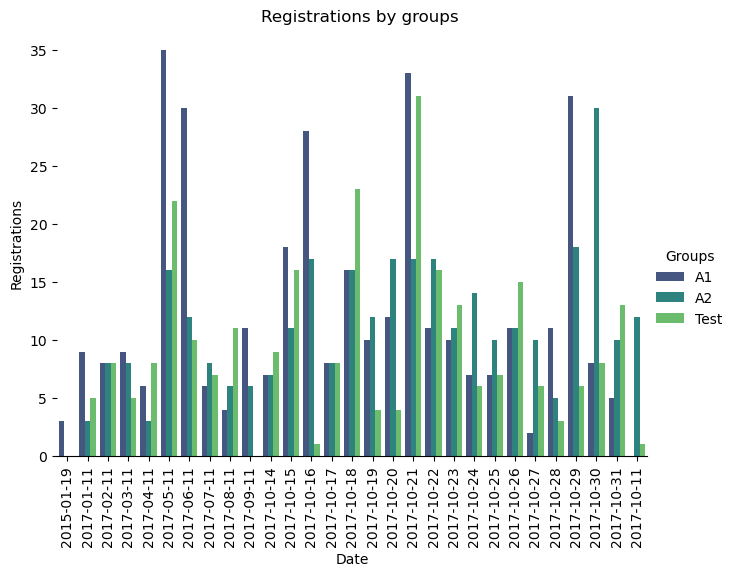

In [29]:
#frequency of registrations in groups

diagram_regs = sns.catplot(
    data = regs_by_day, kind='bar', x='joined_at', y='regs', hue='group', palette='viridis', aspect=13.7/10.27)

diagram_regs.despine(left=True)
diagram_regs.set_ylabels('Registrations')
diagram_regs.set_xlabels('Date')
diagram_regs.legend.set_title('Groups')
diagram_regs.fig.suptitle('Registrations by groups', x=0.5, y=1.01)
plt.xticks(rotation=90);

In [30]:
purchases_by_day = transactions.groupby(['group','paid_at'], as_index= False)\
                          .agg({"uid":"count"})\
                          .rename(columns = {"uid":"purchases"})

In [31]:
#frequency of payments

diagram_regs = sns.catplot(
    data = purchases_by_day, kind='bar', x='paid_at', y='purchases', hue='group', palette='viridis', aspect=13.7/10.27)

diagram_regs.despine(left=True)
diagram_regs.set_ylabels('Purchases')
diagram_regs.set_xlabels('Date')
diagram_regs.legend.set_title('Groups')
diagram_regs.fig.suptitle('Purchases amount in groups by days', x=0.5, y=1.01)
plt.xticks(rotation=90);

The time series looks very strange. The date format is probably confused and we only have information for 2 months (October and November), and not for a year.

##### Let's check the total number of registrations and payments by group

In [32]:
regs_paids = transactions.groupby(['group'], as_index= False)\
                         .agg({"joined_at":"count","paid_at":"count"})\
                         .rename(columns = {"joined_at":"registrations", "paid_at":"paid"})

In [33]:
regs_paids

,group,registrations,paid
0,A1,356,356
1,A2,323,323
2,Test,266,266


In [34]:
paids_country = transactions.groupby(['group','country'], as_index= False)\
                            .agg({"paid_at":"count"})\
                            .rename(columns = {"paid_at":"paid"})\
                            .sort_values(by=['paid'], ascending = False)\
                            .head(10)
paids_country

,group,country,paid
36,A2,United States of America,105
17,A1,United States of America,100
53,Test,United States of America,89
9,A1,Italy,54
5,A1,France,37
42,Test,France,34
27,A2,Italy,31
16,A1,United Kingdom (Great Britain),30
0,A1,Argentina,27
48,Test,Spain,25


In [35]:
pd.crosstab(transactions.group, transactions.product_type) # distribution of purchases by product type in groups

product_type,coins,other_type,premium_no_trial,trial_premium
group,,,,
A1,137,46,106,67
A2,120,43,107,53
Test,101,27,76,62


The number of transactions in groups is comparable. Among the leaders in the number of transactions by country is the USA in all 3 groups.

##### Revenue by products in groups

In [36]:
sns.boxplot(
    x="group", y="revenue",
    hue="group", data=transactions, palette='viridis')
    
plt.title('Revenue by groups');

In [37]:
sns.boxplot(
    x="product_type", y="revenue",
    hue="group", data=transactions, palette='viridis'
)

plt.title('Revenue by countries in groups', x=0.5, y=1.01)

plt.xticks(rotation=90);

##### Average Revenue by country

In [38]:
av_revenue_country = transactions.groupby(['group','country'], as_index= False)\
                                 .agg({"revenue":"mean"})

In [39]:
diagram_av_rev = sns.catplot(
    data = av_revenue_country, kind='bar', x='country', y='revenue', hue='group', palette='viridis', aspect=13.7/10.27)

diagram_av_rev.despine(left=True)
diagram_av_rev.set_ylabels('Av.Revenue')
diagram_av_rev.legend.set_title('Groups')
diagram_av_rev.fig.suptitle('Average revenue in countries', x=0.5, y=1.01)

plt.xticks(rotation=90);

#### Let's check how similar the user groups are

In [40]:
users_a1 = pd.read_csv('./Проект_3_users_control_1.csv', sep = ";")

In [41]:
users_a2 = pd.read_csv('./Проект_3_users_control_2.csv', sep = ";")

In [42]:
users_test = pd.read_csv('./Проект_3_users_test.csv', sep = ";")

In [43]:
users_a1.dtypes

uid                   int64
age                   int64
attraction_coeff      int64
coins               float64
country              object
visit_days           object
gender                int64
age_filter_start      int64
age_filter_end        int64
views_count           int64
was_premium         float64
is_premium          float64
total_revenue         int64
dtype: object

In [44]:
users_a1.duplicated().sum()

0

In [45]:
users_a2.dtypes

uid                   int64
age                   int64
attraction_coeff      int64
coins               float64
country              object
visit_days           object
gender                int64
age_filter_start      int64
age_filter_end        int64
views_count           int64
was_premium         float64
is_premium          float64
total_revenue         int64
dtype: object

In [46]:
users_a2.duplicated().sum()

0

In [47]:
users_test.dtypes

uid                   int64
age                   int64
attraction_coeff      int64
coins               float64
country              object
visit_days           object
gender                int64
age_filter_start      int64
age_filter_end        int64
views_count           int64
was_premium         float64
is_premium          float64
total_revenue         int64
dtype: object

In [48]:
users_test.duplicated().sum()

0

The data types are identical; tables can be combined into a common table.

In [49]:
users_a1['group']= "A1"
users_a2['group']= "A2"
users_test['group']= "Test"

In [50]:
all_users = users_a1.append([users_a2, users_test]) #general user table

C:\Users\ARunaeva\AppData\Local\Temp\ipykernel_26536\1111200710.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_users = users_a1.append([users_a2, users_test]) #general user table


In [51]:
all_users.uid.nunique() #total unique users

12912

In [52]:
#change the column data type from int to string for further grouping

all_users['uid'] = all_users['uid'].astype('string')

In [53]:
transactions['uid'] = transactions['uid'].astype('str')
transactions['uid']=[x.split('.')[0] for x in transactions.uid] # remove 0 at the end of uid

In [54]:
pd.crosstab(all_users.group, all_users.gender)
#comparing the tables with each other by gender

gender,0,1
group,,
A1,182,4158
A2,195,4069
Test,202,4106


In [55]:
all_users.groupby('group').agg({"uid":"count"}) # number of users by groups

,uid
group,
A1,4340
A2,4264
Test,4308


In [56]:
all_users.groupby(['group','gender']).age.mean().round(2)
#comparing the tables with each other according to the ratio of age categories

group  gender
A1     0         29.74
       1         32.20
A2     0         29.07
       1         32.19
Test   0         29.30
       1         32.02
Name: age, dtype: float64

In [57]:
fig,ax = plt.subplots()

all_users.groupby(['group'])\
    .age.hist(alpha=0.7, ax=ax,legend = True); 
# build a histogram based on age values, not categories

##### For convenience, we will divide the age into groups

In [58]:
def age_fun(value):
     if value <= 20:
         return 1
     elif value >= 21 and value <= 30:
         return 2
     elif value >= 31 and value <= 40:
         return 3
     elif value >= 41 and value <= 55: 
         return 4
     else:
         return 5

In [59]:
all_users['age_Coef'] = all_users['age'].apply(age_fun) #create new column with age group

In [60]:
pd.crosstab(all_users.group, all_users.age_Coef)

age_Coef,1,2,3,4,5
group,,,,,
A1,387,1853,1225,797,78
A2,379,1835,1192,767,91
Test,401,1874,1195,749,89


#### Let's combine users and transactions

In [61]:
full = transactions.merge(all_users, on = ('uid','group'), how = "outer")

In [62]:
full.shape

(13332, 22)

In [63]:
full.dtypes

uid                  object
country_x            object
joined_at            object
paid_at              object
revenue             float64
payment_id          float64
from_page            object
product_type         object
group                object
age                 float64
attraction_coeff    float64
coins               float64
country_y            object
visit_days           object
gender              float64
age_filter_start    float64
age_filter_end      float64
views_count         float64
was_premium         float64
is_premium          float64
total_revenue       float64
age_Coef            float64
dtype: object

In [64]:
#let's leave only some columns
full = full[['uid','country_x','joined_at','paid_at','revenue','total_revenue','payment_id','product_type','group','was_premium','is_premium','visit_days','gender','age','age_Coef','attraction_coeff']]

In [65]:
full = full.fillna(0)

In [66]:
full.sort_values(by = 'uid').head(3)

,uid,country_x,joined_at,paid_at,revenue,total_revenue,payment_id,product_type,group,was_premium,is_premium,visit_days,gender,age,age_Coef,attraction_coeff
5452,1053059022,0,0,0,0.0,0.0,0.0,0,A2,1.0,0.0,"2,15,16,20,23,27,28,30,60,90,120,150,180",0.0,21.0,2.0,1.0
8930,891050916,0,0,0,0.0,0.0,0.0,0,A2,0.0,0.0,"1,2,3,4",0.0,34.0,3.0,277.0
2123,891050997,0,0,0,0.0,0.0,0.0,0,A1,0.0,0.0,"1,2,3,4",1.0,38.0,3.0,0.0


In [67]:
full.dtypes

uid                  object
country_x            object
joined_at            object
paid_at              object
revenue             float64
total_revenue       float64
payment_id          float64
product_type         object
group                object
was_premium         float64
is_premium          float64
visit_days           object
gender              float64
age                 float64
age_Coef            float64
attraction_coeff    float64
dtype: object

In [68]:
max_revenue = full.groupby(['group','uid','country_x'])\
                  .agg({"country_x":"count", "revenue":"sum"})\
                  .sort_values(by = "revenue", ascending = True)\
                  .rename(columns = {"country_x":"transactions" })\
                  .tail(5)
# find users with the maximum number of payments and purchases
max_revenue 

transactions   revenue
group uid       country_x                                       
A2    891778551 United Arab Emirates                 1   81796.0
Test  892236423 United States of America            11   86996.0
      892038759 United Arab Emirates                 3  123565.0
      891178380 Spain                                3  129870.0
A1    892333905 Italy                               19  403104.0

In [69]:
full.query("uid == '892333905'")

,uid,country_x,joined_at,paid_at,revenue,total_revenue,payment_id,product_type,group,was_premium,is_premium,visit_days,gender,age,age_Coef,attraction_coeff
29,892333905,Italy,2017-10-16,2017-10-16,12610.0,486330.0,19.0,coins,A1,1.0,1.0,"1,2,3,4,5,6,7,15",1.0,22.0,2.0,175.0
30,892333905,Italy,2017-10-16,2017-10-16,3783.0,486330.0,67.0,other_type,A1,1.0,1.0,"1,2,3,4,5,6,7,15",1.0,22.0,2.0,175.0
31,892333905,Italy,2017-10-16,2017-10-16,3783.0,486330.0,67.0,other_type,A1,1.0,1.0,"1,2,3,4,5,6,7,15",1.0,22.0,2.0,175.0
32,892333905,Italy,2017-10-16,2017-10-16,3783.0,486330.0,67.0,other_type,A1,1.0,1.0,"1,2,3,4,5,6,7,15",1.0,22.0,2.0,175.0
33,892333905,Italy,2017-10-16,2017-10-16,3783.0,486330.0,67.0,other_type,A1,1.0,1.0,"1,2,3,4,5,6,7,15",1.0,22.0,2.0,175.0
34,892333905,Italy,2017-10-16,2017-10-16,31525.0,486330.0,19.0,coins,A1,1.0,1.0,"1,2,3,4,5,6,7,15",1.0,22.0,2.0,175.0
35,892333905,Italy,2017-10-16,2017-10-16,31525.0,486330.0,19.0,coins,A1,1.0,1.0,"1,2,3,4,5,6,7,15",1.0,22.0,2.0,175.0
36,892333905,Italy,2017-10-16,2017-10-16,19773.0,486330.0,146.0,coins,A1,1.0,1.0,"1,2,3,4,5,6,7,15",1.0,22.0,2.0,175.0
37,892333905,Italy,2017-10-16,2017-10-16,31525.0,486330.0,19.0,coins,A1,1.0,1.0,"1,2,3,4,5,6,7,15",1.0,22.0,2.0,175.0
38,892333905,Italy,2017-10-16,2017-10-16,63037.0,486330.0,147.0,premium_no_trial,A1,1.0,1.0,"1,2,3,4,5,6,7,15",1.0,22.0,2.0,175.0


There is a suspicion that this 892333905 representative of the A1 group from Italy either made a mistake when purchasing the number of subscriptions or there was a failure in the system on 10/16/17, since he made 19 transactions for three products on two days in a row. We will delete the entries about him, considering them erroneous.

In [70]:
full = full.drop(full[full.uid == ("892333905")].index)

##### How many users cancel their subscription?

In [71]:
full['is_cancelled'] = np.where(full['is_premium']< full['was_premium'], True, False)
# creating a new column where True-subscription was, but cancelled.
# cases when it was not there at all or is present are not taken into account

In [72]:
full.head()

,uid,country_x,joined_at,paid_at,revenue,total_revenue,payment_id,product_type,group,was_premium,is_premium,visit_days,gender,age,age_Coef,attraction_coeff,is_cancelled
0,891319275,France,2017-05-11,2017-12-11,12727.0,13455.0,147.0,trial_premium,A1,1.0,1.0,"1,2,3",1.0,27.0,2.0,0.0,False
1,891319275,France,2017-05-11,2017-05-11,728.0,13455.0,146.0,coins,A1,1.0,1.0,"1,2,3",1.0,27.0,2.0,0.0,False
2,892421826,Israel,2017-10-14,2017-10-23,14586.0,14586.0,147.0,trial_premium,A1,1.0,1.0,"1,2,4,6,7,10,11,12,13,14,15,17,18,19,20,21,22,...",1.0,31.0,3.0,43.0,False
3,891822480,Italy,2017-10-26,2017-12-11,1911.0,17810.0,19.0,coins,A1,1.0,1.0,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19",1.0,28.0,2.0,337.0,False
4,891822480,Italy,2017-10-26,2017-01-11,1898.0,17810.0,19.0,coins,A1,1.0,1.0,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19",1.0,28.0,2.0,337.0,False


In [73]:
cancelled_groups = full.query('is_cancelled == True').groupby(["group","product_type"]).agg({"uid":"count"})
cancelled_groups
# unsubscribe by product in groups

uid
group product_type         
A1    0                 221
      coins              16
      other_type         12
      premium_no_trial   13
      trial_premium       1
A2    0                 194
      coins              24
      other_type          7
      premium_no_trial   10
      trial_premium       1
Test  0                 234
      coins              13
      other_type          4
      premium_no_trial    7

In [74]:
full['visit_days'] = full['visit_days'].apply(lambda day: len(str(day).split(',')) if day !=0 else 0)

##### Average number of site visits by category and group

In [75]:
av_visits = full.groupby(['group','product_type']).visit_days.mean().round()
av_visits

group  product_type    
A1     0                    4.0
       coins               14.0
       other_type          13.0
       premium_no_trial    11.0
       trial_premium        8.0
A2     0                    4.0
       coins               12.0
       other_type          13.0
       premium_no_trial    11.0
       trial_premium        8.0
Test   0                    4.0
       coins               15.0
       other_type          13.0
       premium_no_trial    13.0
       trial_premium        7.0
Name: visit_days, dtype: float64

##### How many of the users who purchased a premium subscription have never logged into the application? What countries are they from?

In [76]:
zero_visits_premium = full.query('product_type == "premium_no_trial" & visit_days == "0" ')\
                          .groupby(['group','country_x'])\
                          .agg({"paid_at":"count"})\
                          .rename(columns = {"paid_at":"qty"})

In [77]:
zero_visits_premium

,,qty
group,country_x,


Conclusion:
- Although there are quantitative differences in the groups, at this stage they do not seem significant.
- In the test group, the number of users does not exceed the control groups, but the amounts for rhubarb are higher.
- The distribution by gender, age, number of users is also quantitatively comparable.
- Regarding the target audience, we note that the bulk of users are representatives of gender 1 at the age of 32 years.
- In terms of the number of purchases, the USA is the leader in all three groups, and the USA is also the leader in the number of users who buy a subscription and forget about it.
- On average, users spend no more than 15 days on the site, the maximum being those who own the site’s internal currency. Although then they may change the product? But we do not have data on the date of subscription cancellation, for example, to calculate this in more detail.
- In Latvia and Mexico, purchases were only in the test group. And in India, Ukraine, Austria and Lithuania there were no test purchases.
- The best-selling product type is coins, the site’s internal currency.

### Key metrics

According to the conditions of the experiment, the price was changed to premium_no_trial and a payment system was added.
  ***
  -ARPU ((ARPU = all_users_revenue / unique_users_qty)) Will show whether users of the test group began to spend more - renew their subscription (if the price was reduced, for example) or maybe the indicator fell because the price increased.
  ***
  -ARPPU (ARPPU = paid_users_revenue / paying_users_qty) is the average income per paying user, it can be interpreted as the reaction of users to prices as well.
  ***
  -CR_reg (total_action/users * 100%) - conversion from site visit to registration.
  ***
  -CR_trial (registers/users_with_free_premium * 100%) - conversion from registration to free trial version. Shows potentially interested users in the premium version.
  ***
  -CR_premium (registers/users_with_premium_no_trial * 100%) - conversion from registration on the site to purchase of premium_no_trial. If a new payment option has appeared in the test group and new users like it, then this metric should increase significantly compared to the control groups.
We do not have data that the user was first in the trial version, then purchased a paid version. The was_premium and is_premium statuses do not give an unambiguous answer to the payment terms in the past.

In [78]:
full.isna().sum() #the number of  empty lines

uid                 0
country_x           0
joined_at           0
paid_at             0
revenue             0
total_revenue       0
payment_id          0
product_type        0
group               0
was_premium         0
is_premium          0
visit_days          0
gender              0
age                 0
age_Coef            0
attraction_coeff    0
is_cancelled        0
dtype: int64

There are 2 values for revenue in our data. Apparently, revenue is how much the user paid for 1 specific transaction, and total_revenue is the cumulative value of how much he spent in total.

#### APRU

In [79]:
ARPU = full.groupby('group').agg({'revenue':'sum', 'uid':'nunique'})
ARPU['ARPU'] = (ARPU.revenue/ ARPU.uid).round(2)
ARPU

,revenue,uid,ARPU
group,,,
A1,2091700.0,4340,481.96
A2,1907997.0,4264,447.47
Test,2332226.0,4308,541.37


#### ARPPU

In [80]:
# calculating it in a different way than ARPU

unique_buyers_a1 = full.query('group == "A1" & revenue > 0').uid.unique()
unique_buyers_a2 = full.query('group == "A2" & revenue > 0').uid.unique()
unique_buyers_Test = full.query('group == "Test" & revenue > 0').uid.unique()

In [81]:
ARPPU_a1 = (full.query('group == "A1"').agg({"revenue":"sum"}))/len(unique_buyers_a1)

In [82]:
ARPPU_a2 = (full.query('group == "A2"').agg({"revenue":"sum"}))/len(unique_buyers_a2)

In [83]:
ARPPU_Test = (full.query('group == "Test"').agg({"revenue":"sum"}))/len(unique_buyers_Test)

In [84]:
print("ARPPU(A1):" + str(ARPPU_a1))
print("ARPPU(A2):" + str(ARPPU_a2))
print("ARPPU(Test):" + str(ARPPU_Test))

ARPPU(A1):revenue    10894.270833
dtype: float64
ARPPU(A2):revenue    10203.192513
dtype: float64
ARPPU(Test):revenue    15974.150685
dtype: float64


#### Conversion options for groups

Let's check if it is possible to not register and buy the product?

In [85]:
full.query('joined_at == 0 & product_type != 0')

,uid,country_x,joined_at,paid_at,revenue,total_revenue,payment_id,product_type,group,was_premium,is_premium,visit_days,gender,age,age_Coef,attraction_coeff,is_cancelled


All registrants have the product

Is it possible not to register and take the free version?

In [86]:
full.query('joined_at == 0 & product_type == "trial_premium"')

,uid,country_x,joined_at,paid_at,revenue,total_revenue,payment_id,product_type,group,was_premium,is_premium,visit_days,gender,age,age_Coef,attraction_coeff,is_cancelled


Free version requires registration

In [87]:
all_users_groups = full.groupby(['group'], as_index = False)\
                       .agg({"uid":"count"})\
                       .rename(columns ={"uid":"users"})
# how many users are in each group in total

In [88]:
reg_users = full.query('joined_at != 0')\
                 .groupby(['group'], as_index = False)\
                 .agg({"uid":"count"})\
                 .rename(columns ={"uid":"registrations"})
# how many registered users are in each group

In [89]:
cr_reg = all_users_groups.merge(reg_users, on=['group'], how = 'inner')

cr_reg['cr_reg'] = (cr_reg['registrations']/cr_reg['users']).mul(100).round(2)

In [90]:
cr_reg #  get the portion of site users by group who have registered 

,group,users,registrations,cr_reg
0,A1,4485,337,7.51
1,A2,4400,323,7.34
2,Test,4428,266,6.01


Now let's see how many people by group were interested in a premium subscription, but took the trial version.

In [91]:
trial_free_premium_user = full.query('product_type == "trial_premium"')\
                                 .groupby(['group'], as_index = False)\
                                 .agg({"uid":"count"})\
                                 .rename(columns ={"uid":"trial_users"})

In [92]:
cr_trial = reg_users.merge(trial_free_premium_user, on=['group'], how = 'inner')

cr_trial['cr_trial'] = (cr_trial['trial_users']/cr_trial['registrations']).mul(100).round(2)
cr_trial  # get the portion of registered users with a premium trial version 

,group,registrations,trial_users,cr_trial
0,A1,337,67,19.88
1,A2,323,53,16.41
2,Test,266,62,23.31


And finally, let’s see how many people by group bought a premium subscription.

In [93]:
premium_users = full.query('product_type == "premium_no_trial"')\
                    .groupby(['group'], as_index = False)\
                    .agg({"uid":"count"})\
                    .rename(columns ={"uid":"premium_users"})

In [94]:
cr_premium = reg_users.merge(premium_users, on=['group'], how = 'inner')
cr_premium['cr_premium'] = (cr_premium['premium_users']/cr_premium['registrations']).mul(100).round(2)
cr_premium # get the portion of registered users with the premium version 

,group,registrations,premium_users,cr_premium
0,A1,337,105,31.16
1,A2,323,107,33.13
2,Test,266,76,28.57


Conclusion: users in the test group pay more, but the demand for the paid version is lower in the test group than in the control group. However, interest in the free version is higher in the test group -> There is interest in the product, but not much motivation to pay for it.

The prices have probably increased, but the new payment systems are not more attractive than the previously used ones.

#### Let's see how valid our conclusions are. First, let's check the splitting system.


Knowing that there was a particularly active buyer in group A1, we will compare the control groups by total_revenue also on raw data, and then we will check the splitting system.

In [95]:
ttl_revenue = full.query("group == ('A1','A2')")\
                   .groupby(['group','country_x'], as_index= False)\
                   .agg({'total_revenue':'sum'})\
                   .pivot(index=['country_x'], columns='group',values='total_revenue')

In [96]:
ttl_revenue

group,A1,A2
country_x,,
0,0.0,0.0
Argentina,422916.0,309517.0
Australia,18304.0,32084.0
Austria,NaN,36504.0
Belgium,45630.0,150683.0
Canada,217100.0,38428.0
Chile,160368.0,242021.0
France,416832.0,191451.0
Germany,39442.0,127647.0


In group A1, buyers without a location and, probably, registration were noticed

In [97]:
cheatings = full.query('country_x == 0 & group == "A1"')\
                .groupby('uid').agg({'total_revenue':'sum'})\
                .sort_values(by = 'total_revenue', ascending = False)\
                .query('total_revenue > 0')
cheatings

,total_revenue
uid,


In [98]:
full.query("uid ==('891583611','891580347','891607515','891568008','960936960')")

,uid,country_x,joined_at,paid_at,revenue,total_revenue,payment_id,product_type,group,was_premium,is_premium,visit_days,gender,age,age_Coef,attraction_coeff,is_cancelled
141,960936960,Russian Federation,2015-01-19,2016-12-14,26.0,26.0,0.0,other_type,A1,1.0,1.0,27,1.0,30.0,2.0,4.0,False
142,960936960,Russian Federation,2015-01-19,2016-12-14,637.0,26.0,0.0,other_type,A1,1.0,1.0,27,1.0,30.0,2.0,4.0,False
143,960936960,Russian Federation,2015-01-19,2016-12-14,143.0,26.0,0.0,other_type,A1,1.0,1.0,27,1.0,30.0,2.0,4.0,False
225,891568008,Argentina,2017-10-31,2017-08-11,10569.0,10569.0,147.0,trial_premium,A1,1.0,1.0,7,1.0,42.0,4.0,304.0,False
238,891583611,Spain,2017-10-31,2017-07-11,16536.0,16536.0,147.0,trial_premium,A1,1.0,1.0,11,1.0,21.0,2.0,250.0,False
320,891580347,United States of America,2017-10-31,2017-07-11,13468.0,13468.0,147.0,trial_premium,A1,1.0,1.0,2,1.0,25.0,2.0,250.0,False
335,891607515,Spain,2017-10-31,2017-11-13,6292.0,12597.0,147.0,premium_no_trial,A1,1.0,1.0,15,1.0,58.0,5.0,510.0,False
336,891607515,Spain,2017-10-31,2017-11-13,6305.0,12597.0,19.0,coins,A1,1.0,1.0,15,1.0,58.0,5.0,510.0,False


Strange situation: there is the age and type of product, uid, but there is no payment date, although there is payment. Perhaps these are the values of some payments in the past, since they are in the total indicator. But in any case, the absence of a country and the fact that payments were made without registration have a negative meaning for us.
Plus, we remember a representative of group A1 with many similar purchases with uid 892333905. Let's update our full dataset without this data.

In [99]:
full = full.drop(full[full.uid == ("960936960","891583611","891607515","891580347","891568008")].index)

#### А/А тест.

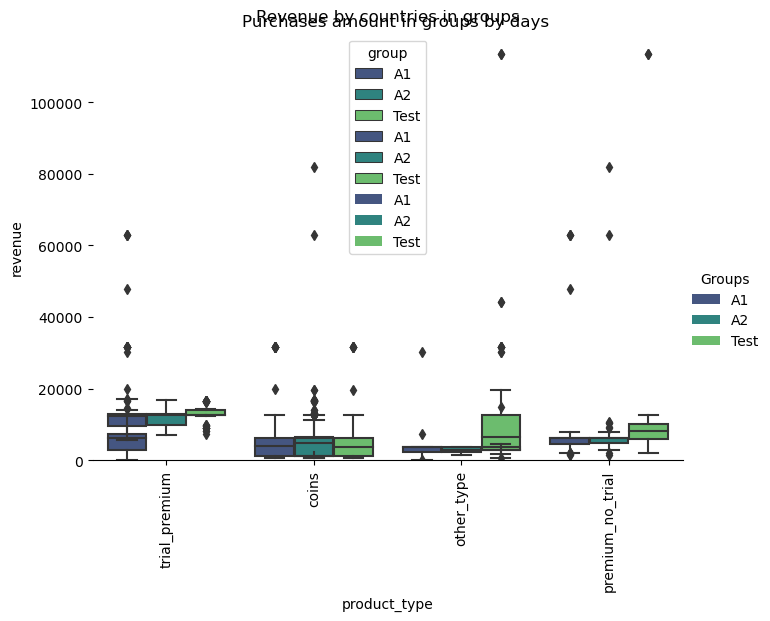

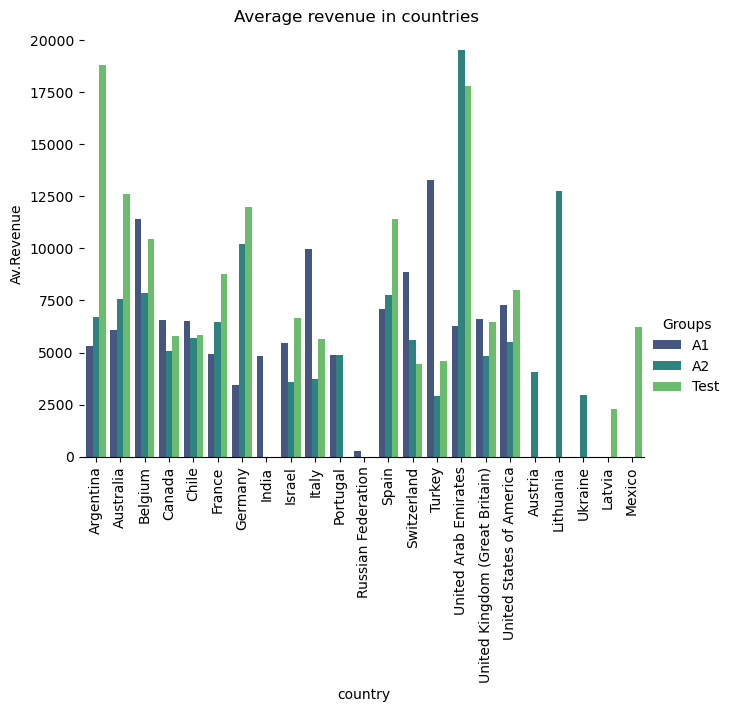

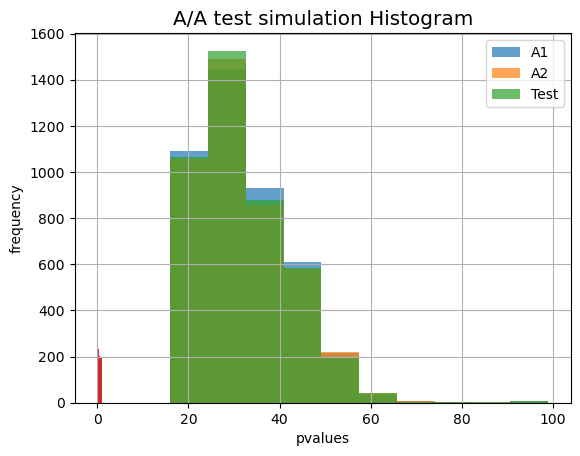

In [100]:
simulations = 10000
n = 100
res = []

# A/A test by по total_revenue
for i in range(simulations):
    x1 = full[full.group=='A1']['total_revenue'].sample(n, replace = False).values
    x2 = full[full.group=='A2']['total_revenue'].sample(n, replace = False).values
    
    res.append(stats.ttest_ind(x1, x2, equal_var = False)[1])
    
# viz
plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("A/A test simulation Histogram")
plt.show()


In [101]:
# FPR показывает превышает ли количество ложноположительных случаев альфа
sum(np.array(res) < 0.05)/ simulations

0.0369

In the case of total_revenue, the splitting system is fair. FPR less than 5%.
The distribution of pValue after the syntheses is more similar to uniform.

Let's make sure that our groups are also representative of whether they have a premium subscription

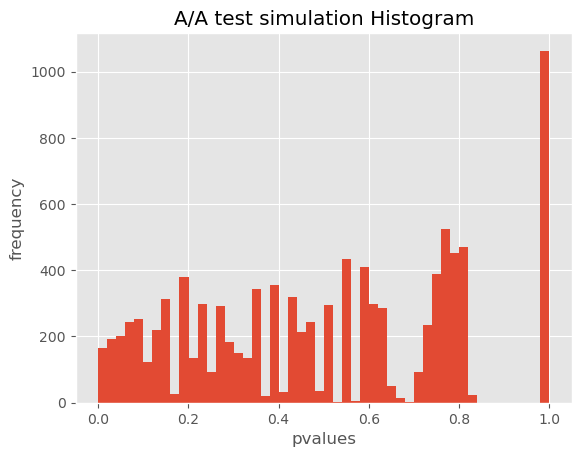

In [102]:
simulations = 10000
n = 100
res = []

# A/A test by subscription type
for i in range(simulations):
    y1 = full[full.group=='A1']['is_premium'].sample(n, replace = False).values
    y2 = full[full.group=='A2']['is_premium'].sample(n, replace = False).values
    
    res.append(stats.ttest_ind(y1, y2, equal_var = False)[1])
    
# viz
plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("A/A test simulation Histogram")
plt.show()

In [103]:
# FPR by sunscription type
sum(np.array(res) < 0.05)/ simulations

0.0452

FPR is also less than 5%; the groups can be considered representative based on the presence of a premium subscription.

#### A/B test

In [104]:
full.groupby('group').revenue.describe()

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
A1,4485.0,466.376812,2389.052174,0.0,0.0,0.0,0.0,63037.0
A2,4400.0,433.635682,2361.618727,0.0,0.0,0.0,0.0,81796.0
Test,4428.0,526.699639,3445.600810,0.0,0.0,0.0,0.0,113477.0


In [105]:
full.groupby('group').revenue.describe()

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
A1,4485.0,466.376812,2389.052174,0.0,0.0,0.0,0.0,63037.0
A2,4400.0,433.635682,2361.618727,0.0,0.0,0.0,0.0,81796.0
Test,4428.0,526.699639,3445.600810,0.0,0.0,0.0,0.0,113477.0


##### Revenue

Revenue = QTY * Price. We do not have data on payment currencies (and the geography of purchases is large), and we do not have data on the duration of subscriptions (QTY).
Let's first look at the distribution of revenue in each group, using the example of the key product premium_no_trial. Even if purchases in groups were made by representatives of different currencies, but the dispersion across product categories in terms of revenue is similar, we will be satisfied.

By product premium_no_trial in group

In [106]:
test_prod_rev = full.query('group == "Test" & revenue > 0 & product_type == "premium_no_trial"').revenue # revenue "premium_no_trial" in Test group
A1_prod_rev = full.query('group == "A1" & revenue > 0 & product_type == "premium_no_trial"').revenue # revenue "premium_no_trial" in A1
A2_prod_rev = full.query('group == "A2" & revenue > 0 & product_type == "premium_no_trial"').revenue # revenue "premium_no_trial" in A2

Let's look at the distribution of revenue premium_no_trial by group

In [107]:
f, ax = plt.subplots(figsize=(10, 7))


sns.histplot(
test_prod_rev 
   )

plt.title('Revenue by "premium_no_trial" in Test', x=0.5, y=1.01)

Text(0.5, 1.01, 'Revenue by "premium_no_trial" in Test')

In [108]:
f, ax = plt.subplots(figsize=(10, 7))


sns.histplot(
A1_prod_rev 
   )

plt.title('Revenue by "premium_no_trial" in A1', x=0.5, y=1.01)

Text(0.5, 1.01, 'Revenue by "premium_no_trial" in A1')

In [109]:
f, ax = plt.subplots(figsize=(10, 7))


sns.histplot(
A2_prod_rev 
   )

plt.title('Revenue by "premium_no_trial" in A2', x=0.5, y=1.01)

Text(0.5, 1.01, 'Revenue by "premium_no_trial" in A2')

#### Variance

Variance for premium_no_trial in Groups.
- H0: variances are equal (in terms of the amount of purchases within one product in all countries).
- H1: variances differ statistically significantly.

In [110]:
stats.levene(test_prod_rev, A1_prod_rev) # by premium_no_trial in А1 

LeveneResult(statistic=2.1594743512455237, pvalue=0.14344853187503281)

(A1-test): p-value > 0.05, accept Н0.

In [111]:
stats.levene(test_prod_rev, A2_prod_rev) # by premium_no_trial in  А2

LeveneResult(statistic=2.506290116645416, pvalue=0.11513832140174791)

(A2-test): p-value > 0.05, accept Н0.

In [112]:
stats.levene(A1_prod_rev, A2_prod_rev) # by premium_no_trial in control groups

LeveneResult(statistic=0.036135462255358596, pvalue=0.8494196455838825)

(A1-A2): p-value > 0.05, accept Н0.

Apparently, “normalized revenue” in the condition means that it is indicated in a single currency. We will assume that purchase amounts within one product in all countries are comparable to each other.

### A1/A2/Test 
#### Testing hypotheses using metrics

Let's create variables for samples of ARPU values for all users

In [113]:
ARPU_A1 = full.query('group == "A1"').revenue
ARPU_A2 = full.query('group == "A2"').revenue
ARPU_Test = full.query('group == "Test"').revenue

#### Distribution in groups

In [114]:
sns.histplot(ARPU_A1, kde=True, color='blue')
sns.histplot(ARPU_A2, kde=True, color='red')
sns.histplot(ARPU_Test, kde=True, color='green')
plt.title("ARPU by groups");

Let's create variables for samples of average bill values for paying users

In [115]:
ARPPU_A1 = full.query('group == "A1" & revenue > 0').revenue
ARPPU_A2 = full.query('group == "A2" & revenue > 0').revenue
ARPPU_Test = full.query('group == "Test" & revenue > 0').revenue

In [116]:
sns.histplot(ARPPU_A1, kde=True, color='blue')
sns.histplot(ARPPU_A2, kde=True, color='red')
sns.histplot(ARPPU_Test, kde=True, color='green')
plt.title("ARPPU by groups");

##### Let's check for normality of distribution using the Shapiro-Wilk test, where
- H0: the distribution from which the sample is taken is normal.
- H1: The distribution from which the sample is drawn is not normal.

In [117]:
stats.shapiro(ARPU_A1)

ShapiroResult(statistic=0.19031494855880737, pvalue=0.0)

In [118]:
stats.shapiro(ARPU_A2)

ShapiroResult(statistic=0.1726122498512268, pvalue=0.0)

In [119]:
stats.shapiro(ARPU_Test)

ShapiroResult(statistic=0.13292890787124634, pvalue=0.0)

In [120]:
stats.shapiro(ARPPU_A1)

ShapiroResult(statistic=0.5866697430610657, pvalue=1.4801162586394618e-27)

In [121]:
stats.shapiro(ARPPU_A2)

ShapiroResult(statistic=0.5297449231147766, pvalue=1.7662834723952801e-28)

In [122]:
stats.shapiro(ARPPU_Test)

ShapiroResult(statistic=0.49752241373062134, pvalue=8.011712953511395e-27)

Conclusion based on the results of the Shapiro-Wilk test P-value<0.05. We reject H0. The distributions are not normal.

We know that the distributions are not normal; they contain outliers. In this case, to assess stat. We will use Bootstrap to determine the significance of the difference between the means in the samples. It allows you to repeatedly extract subsamples from the sample obtained as part of an experiment. In the resulting subsamples, statistics are considered (mean, in our case).

In [123]:
# Bootstrap function

def get_bootstrap(
    data_column_1, # numeric values of the first sample
    data_column_2, # numeric values of the second sample
    boot_it = 1000, # number of bootstrap subsamples
    statistic = np.mean, # statistics we are interested in
    bootstrap_conf_level = 0.95 # significance level
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # extract subsamples
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # return parameter
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) # mean() - apply statistics
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Viz
    plt.hist(pd_boot_data[0], bins = 50)
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}

##### Results for ARPU

  0%|          | 0/1000 [00:00<?, ?it/s]

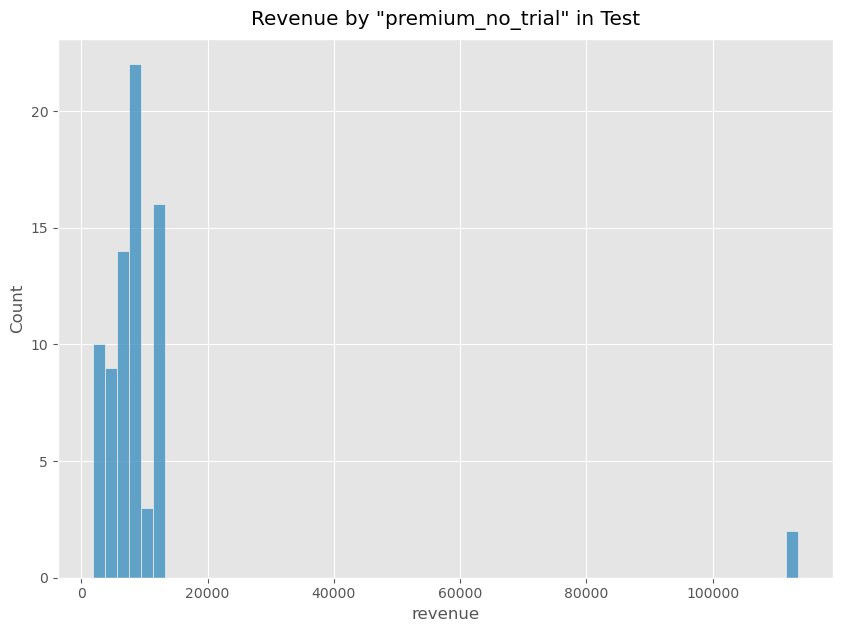

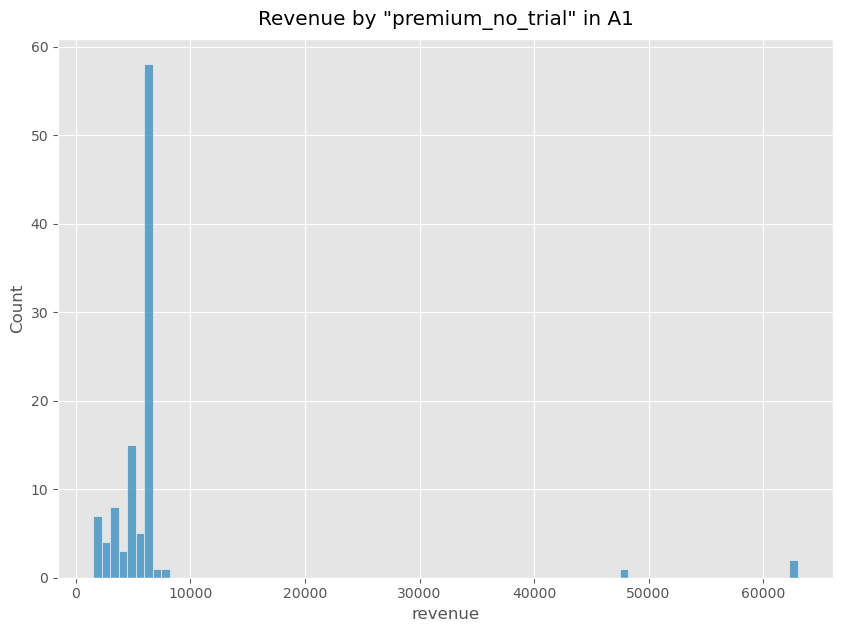

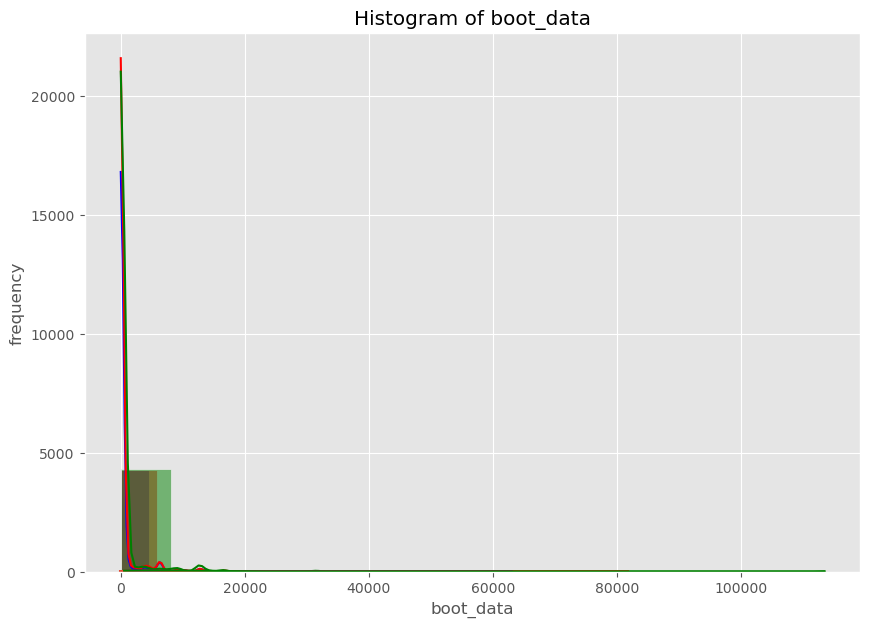

In [124]:
arpu_A1_test = get_bootstrap(ARPU_Test, ARPU_A1, boot_it = 1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

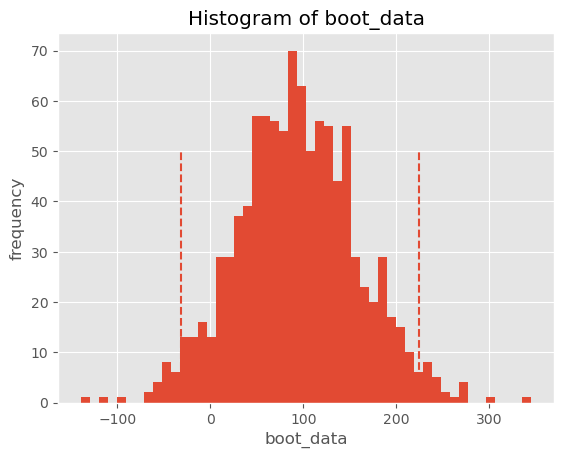

In [125]:
arpu_A2_test = get_bootstrap(ARPU_Test, ARPU_A2, boot_it = 1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

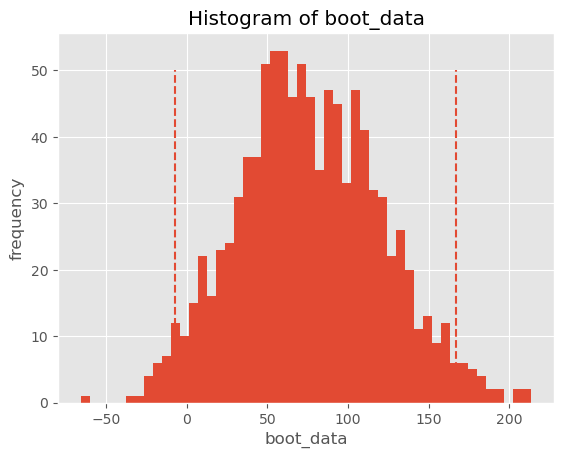

In [126]:
arpu_A1_A2test = get_bootstrap(ARPU_Test, full.query('group=="A1" or group=="A2"').revenue, boot_it = 1000)

In [127]:
print("ARPU(A1-Test)" + "p_value: " + str(arpu_A1_test["p_value"]))
print("ARPU(A2-Test)" + "p_value: " + str(arpu_A2_test["p_value"]))
print("ARPU(A1 + A2 / B1)" + "p_value: " + str(arpu_A1_A2test["p_value"]))

ARPU(A1-Test)p_value: 0.3436779397825397
ARPU(A2-Test)p_value: 0.14494339460316835
ARPU(A1 + A2 / B1)p_value: 0.08636193440623728


If p-value > 0.05, we accept H0.
If zero is outside the confidence interval, then the differences are statistically significant, otherwise not.
  Conclusion:
- A1-test - the differences are not significant, we accept H0;
- A2-test - the differences are not significant, we accept H0;
- A1 + A2 / B1 - the differences are not significant, we accept H0;

#### Results for ARPPU

  0%|          | 0/1000 [00:00<?, ?it/s]

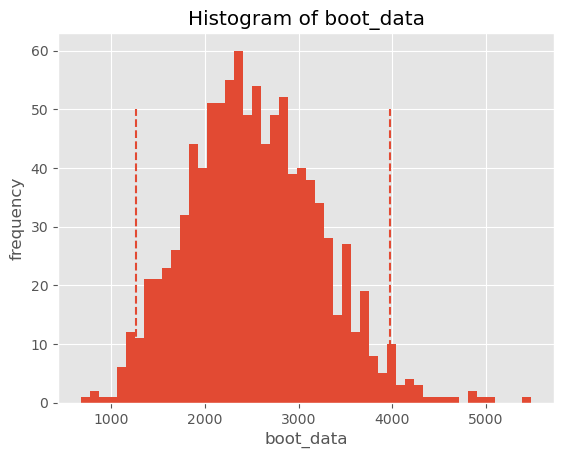

In [128]:
arppu_A1_test = get_bootstrap(ARPPU_Test, ARPPU_A1, boot_it = 1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

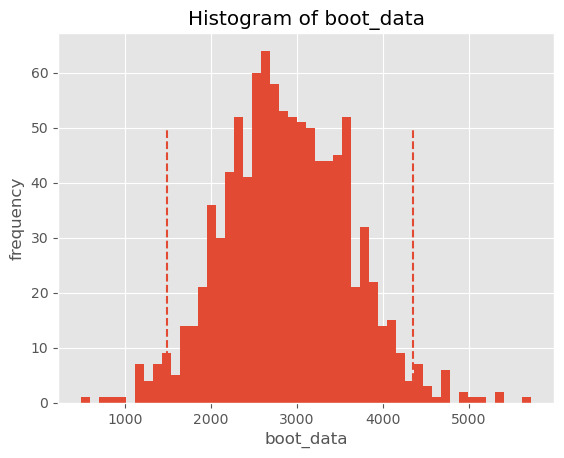

In [129]:
arppu_A2_test = get_bootstrap(ARPPU_Test, ARPPU_A2, boot_it = 1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

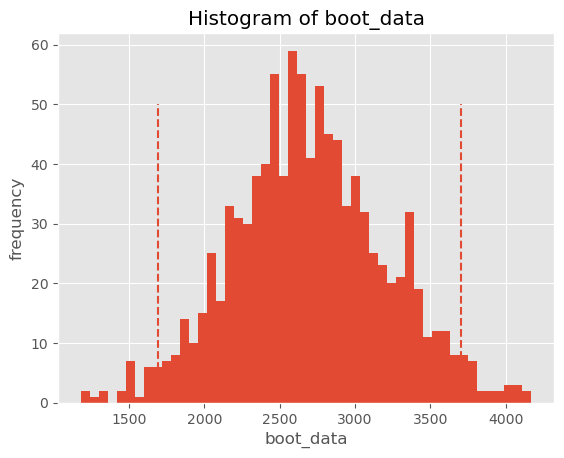

In [130]:
arppu_A1_A2test = get_bootstrap(ARPPU_Test, full.query('(group=="A1" or group=="A2") and revenue > 0').revenue, boot_it = 1000)

In [131]:
print("ARPPU(A1-Test)" + "p_value: " + str(arppu_A1_test["p_value"]))
print("ARPPU(A2-Test)" + "p_value: " + str(arppu_A2_test["p_value"]))
print("ARPPU(A1 + A2 / B1)" + "p_value: " + str(arppu_A1_A2test["p_value"]))

ARPPU(A1-Test)p_value: 0.00031843848809107503
ARPPU(A2-Test)p_value: 6.839262799080341e-05
ARPPU(A1 + A2 / B1)p_value: 1.0901944364846705e-07


If p-value > 0.05, we accept H0.
If zero is outside the confidence interval, then the differences are statistically significant, otherwise not.
Conclusion:
- A1-test - the differences are significant, we do not accept H0;
- A2-test - the differences are significant, we do not accept H0;
- A1 + A2 / B1 - the differences are significant, we do not accept H0;

#### CR and its types.
Conversion is a binomial metric. We will use Chi-square to evaluate this metric

The average bill among paying users between the control and test groups did not show an increase in the test group. Perhaps new payment systems have made it possible to attract more users?
___
- Hypothesis H0: hypothesis about the homogeneity of populations: innovations did not bring us new customers.
- Hypothesis H1: populations are not homogeneous: new systems have changed the proportion of those who bought premium subscriptions.

In [132]:
import statsmodels.stats.proportion as proportion

In [133]:
?? proportion.proportions_chisquare

In [134]:
# conversion from visit to registration
chi2stat, pval, table = proportion.proportions_chisquare(cr_reg['registrations'],cr_reg['users'])

In [135]:
alpha = 0.05

In [136]:
print("p-value is " + str (pval))
if pval <= alpha:
 print('We reject H0 - stat. there is a significant difference in conversion to registration between groups' )
else :
 print('We do not reject H0 - stat. no significant difference in conversion to registration between groups' )

p-value is 0.009449949727754472
We reject H0 - stat. there is a significant difference in conversion to registration between groups


In [137]:
# conversion of registered users into purchasing a premium trial version
chi2stat, pval_trial, table = proportion.proportions_chisquare(cr_trial['trial_users'],cr_trial['registrations'])

In [138]:
print("p-value is " + str (pval_trial))
if pval_trial <= alpha:
 print('We reject H0 - there is a statistically significant difference in the conversion of registered users into purchasing a premium trial version between groups' )
else :
 print('We do not reject H0 - statistically there is no significant difference in the conversion of registered users into purchasing a premium trial version between groups' )

p-value is 0.10999417201464101
We do not reject H0 - statistically there is no significant difference in the conversion of registered users into purchasing a premium trial version between groups


In [139]:
# conversion of registered users into purchasing the premium paid version
chi2stat, pval_premium, table = proportion.proportions_chisquare(cr_premium['premium_users'],cr_premium['registrations'])

In [140]:
print("p-value is " + str (pval_premium))
if pval_premium <= alpha:
 print('We reject H0 - there is a stat. significant difference in the conversion of registered users into purchasing the premium paid version between groups' )
else :
 print('We do not reject H0 - stat. there is no significant difference in the conversion of registered users into purchasing the premium paid version between the groups' )

p-value is 0.4932515194199052
We do not reject H0 - stat. there is no significant difference in the conversion of registered users into purchasing the premium paid version between the groups


In [141]:
cr_premium

,group,registrations,premium_users,cr_premium
0,A1,337,105,31.16
1,A2,323,107,33.13
2,Test,266,76,28.57


##### Conclusion:
the test showed that the decrease in conversion at the stage of the funnel from registration to purchase in the test group is not statistically significant, that is, in all groups the result is the same -> which indicates the ineffectiveness of the tested measures.

#### Does the innovation make sense among any specific user groups?

We will select only those who purchased the premium version. We will assume that success lies in an increase in the number of buyers and the average bill across the country.

In [142]:
premium_top = full.query('product_type == "premium_no_trial"')\
                  .groupby(['uid', 'country_x','group'], as_index=False).agg(mean_revenue=('revenue', 'mean'))\
                  .sort_values(by=['mean_revenue'], ascending = False)

In [143]:
premium_top

,uid,country_x,group,mean_revenue
166,892038759,United Arab Emirates,Test,113477.0
14,891178380,Spain,Test,113477.0
123,891778551,United Arab Emirates,A2,81796.0
235,892307238,Spain,A2,63037.0
219,892216461,United States of America,A1,63037.0
...,...,...,...,...
83,891531897,Italy,Test,1898.0
98,891613833,Italy,A1,1898.0
260,892393119,Italy,A1,1807.0
207,892176342,United States of America,A1,1508.0


In [144]:
premium_top = premium_top.groupby(['group', 'country_x'], as_index=False) \
           .agg({'uid':'count','mean_revenue':'mean'})\
          .rename(columns ={"uid":"group_size"})

In [145]:
premium_top['mean_revenue'] = premium_top['mean_revenue'].round(2)

In the study of raw data, we already saw in the graph that there were no test purchases in India, Ukraine, Austria and Lithuania. Let's see, maybe somewhere there was only the type of subscription in question, then we will exclude these countries from further analysis.

In [146]:
premium_top_pivoted = premium_top.pivot(index=['country_x'], columns='group',
                                        values=['mean_revenue', 'group_size'])

In [147]:
premium_top_pivoted

mean_revenue                     group_size  \
group                                    A1        A2      Test         A1   
country_x                                                                    
Argentina                           6089.20   7177.86   9882.60        5.0   
Australia                           3588.00   4719.00  12597.00        1.0   
Austria                                 NaN   4056.00       NaN        NaN   
Belgium                             3042.00   6539.00  12597.00        1.0   
Canada                              5209.75   3549.00   6963.67        4.0   
Chile                               5905.25   5772.00   8183.50        4.0   
France                              5219.50   5456.75   6465.33       12.0   
Germany                             5053.75   6833.67   5167.50        4.0   
India                               4810.00       NaN       NaN        2.0   
Israel                              5978.70   6292.00  12597.00       10.0   
Italy                               5071.08   6405.75   8183.50       12.0   
Latvia                                  NaN       NaN   6357.00        NaN   
Mexico                                  NaN       NaN   6214.00        NaN   
Portugal                            6292.00   4867.20       NaN        1.0   
Spain                               6669.00  11538.80  24918.83        5.0   
Switzerland                         4680.00   5282.33       NaN        1.0   
Turkey                             23361.00       NaN   3614.00        3.0   
Ukraine                                 NaN   6357.00       NaN        NaN   
United Arab Emirates                5247.67  24823.50  25789.83        3.0   
United Kingdom (Great Britain)      6552.00   5365.15   6466.20        4.0   
United States of America            8885.50   5535.56   8920.41       26.0   

                                            
group                             A2  Test  
country_x                                   
Argentina                        7.0   5.0  
Australia                        1.0   1.0  
Austria                          1.0   NaN  
Belgium                          5.0   1.0  
Canada                           1.0   3.0  
Chile                            6.0   4.0  
France                           8.0   4.0  
Germany                          3.0   2.0  
India                            NaN   NaN  
Israel                           2.0   2.0  
Italy                            4.0   7.0  
Latvia                           NaN   1.0  
Mexico                           NaN   1.0  
Portugal                         5.0   NaN  
Spain                           10.0   6.0  
Switzerland                      3.0   NaN  
Turkey                           NaN   1.0  
Ukraine                          1.0   NaN  
United Arab Emirates             4.0   6.0  
United Kingdom (Great Britain)   9.0   5.0  
United States of America        32.0  18.0

In [148]:
 premium_top_pivoted = premium_top_pivoted.drop(['Ukraine','Switzerland', 'Portugal', 'India', 'Austria']) 
# countries without test purchases

In [149]:
premium_top_pivoted

mean_revenue                     group_size  \
group                                    A1        A2      Test         A1   
country_x                                                                    
Argentina                           6089.20   7177.86   9882.60        5.0   
Australia                           3588.00   4719.00  12597.00        1.0   
Belgium                             3042.00   6539.00  12597.00        1.0   
Canada                              5209.75   3549.00   6963.67        4.0   
Chile                               5905.25   5772.00   8183.50        4.0   
France                              5219.50   5456.75   6465.33       12.0   
Germany                             5053.75   6833.67   5167.50        4.0   
Israel                              5978.70   6292.00  12597.00       10.0   
Italy                               5071.08   6405.75   8183.50       12.0   
Latvia                                  NaN       NaN   6357.00        NaN   
Mexico                                  NaN       NaN   6214.00        NaN   
Spain                               6669.00  11538.80  24918.83        5.0   
Turkey                             23361.00       NaN   3614.00        3.0   
United Arab Emirates                5247.67  24823.50  25789.83        3.0   
United Kingdom (Great Britain)      6552.00   5365.15   6466.20        4.0   
United States of America            8885.50   5535.56   8920.41       26.0   

                                            
group                             A2  Test  
country_x                                   
Argentina                        7.0   5.0  
Australia                        1.0   1.0  
Belgium                          5.0   1.0  
Canada                           1.0   3.0  
Chile                            6.0   4.0  
France                           8.0   4.0  
Germany                          3.0   2.0  
Israel                           2.0   2.0  
Italy                            4.0   7.0  
Latvia                           NaN   1.0  
Mexico                           NaN   1.0  
Spain                           10.0   6.0  
Turkey                           NaN   1.0  
United Arab Emirates             4.0   6.0  
United Kingdom (Great Britain)   9.0   5.0  
United States of America        32.0  18.0

Noteworthy are Latvia and Mexico, where purchases are only available in the test group;
Australia, Spain, Italy, Belgium, Israel, UAE with an increase in average revenue in the test group and not the highest number of people in the group.

In [150]:
countries = ['Australia', 'Spain', 'Italy', 'Belgium', 'Israel', 'United Arab Emirates']

##### Let's look at buyers in these countries

In [151]:
success = full.query('country_x in @countries & product_type == "premium_no_trial"')\
              .groupby(['age_Coef','gender'])\
              .agg({"uid":"count"})\
              .sort_values(by = 'uid', ascending = False)

In [152]:
success

,,uid
age_Coef,gender,
2.0,1.0,42
3.0,1.0,25
4.0,1.0,16
1.0,1.0,2
5.0,1.0,2


Conclusion. The experiment can be considered unsuccessful.
- ARPU, not significantly different
- ARPPU, much higher in the test group
Despite the fact that the tests showed stat. significance in terms of growth of the average bill among paying users; the conversion rate from registration to purchase of the premium version is identical to that of the control groups.
We looked at the funnel (visit-register-trial/paid premium purchase version):
- CR-reg (conversion to registration) in the test group is lower than the control group;
- CR_trial (conversion from registration to premium trial version) is higher in the test group;
- CR_premium (conversion from registration to premium purchase) is also lower than control groups.
___
  The subscription price has probably been increased. People are interested in a premium product, but new payment methods do not motivate them to buy.
If we “roll out” innovations, then for representatives of gender 1 aged 21-40 years in the following countries:
Australia, Belgium, Israel, Spain, Italy, UAE. It is worth noting that users from Latvia and Mexico appeared in the test group.
___
It is also worth recommending that we try to eliminate the causes of failures when a user can purchase something without registration and the principle of setting dates in the system.